In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eFELExt
import re

In [2]:
n = 36

In [3]:
note = [ '' ] * n

# AP amplitude check

control_136 1601 7 | 0
AP_amplitude:	 55.9 	


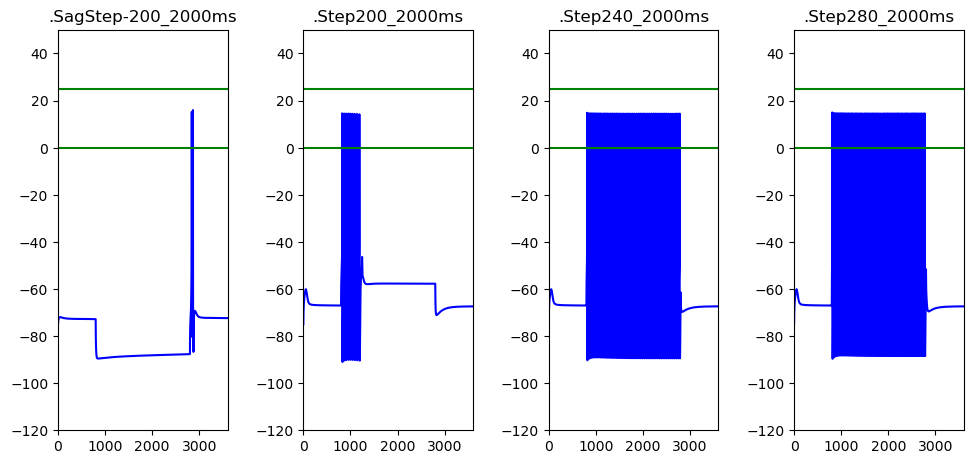





control_136 5097 6 | 1
AP_amplitude:	 29.4 	<<<


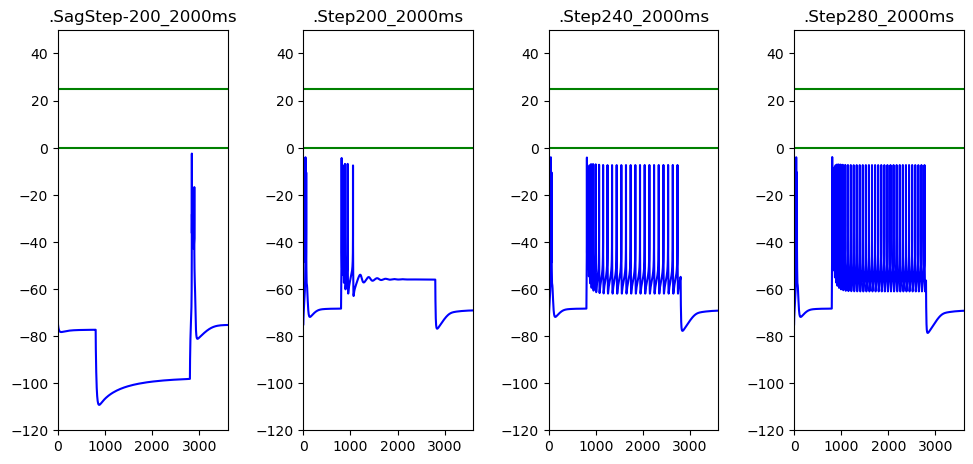

AP too short



control_136 7295 7 | 2
AP_amplitude:	 76.9 	<<<


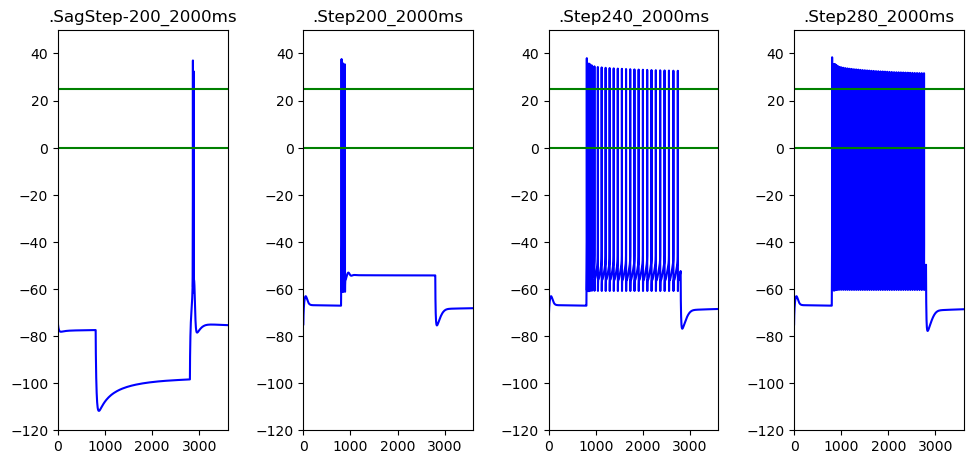

AP too tall



control_136 7504 11 | 3
AP_amplitude:	 42.3 	


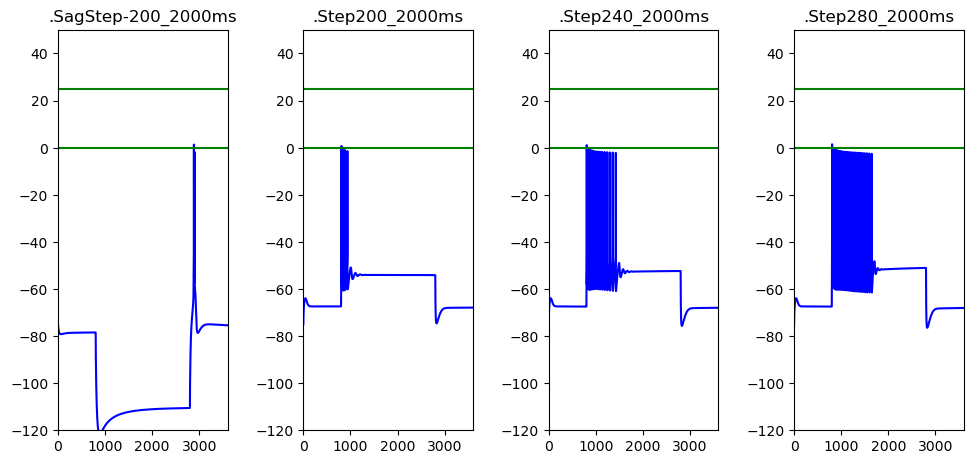





control_136 9847 11 | 4
AP_amplitude:	 56.1 	


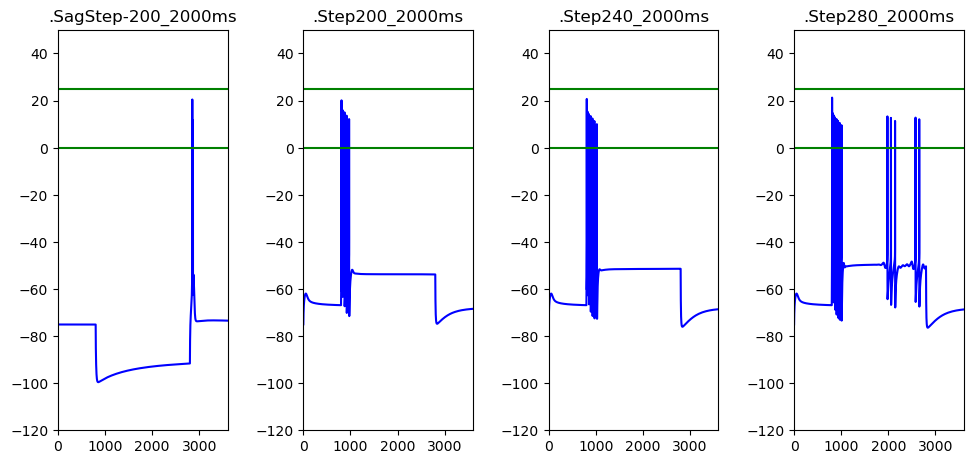





control_136 16281 13 | 5
AP_amplitude:	 56.4 	


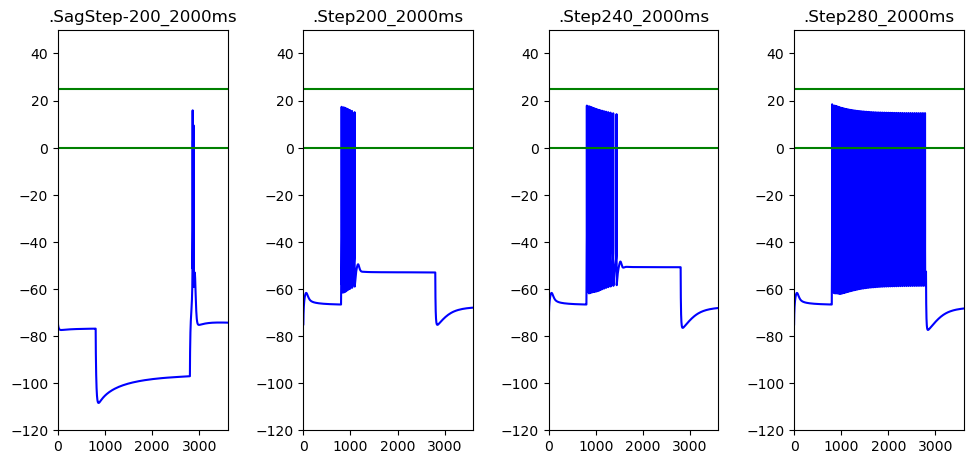





control_136 17782 4 | 6
AP_amplitude:	 43.8 	


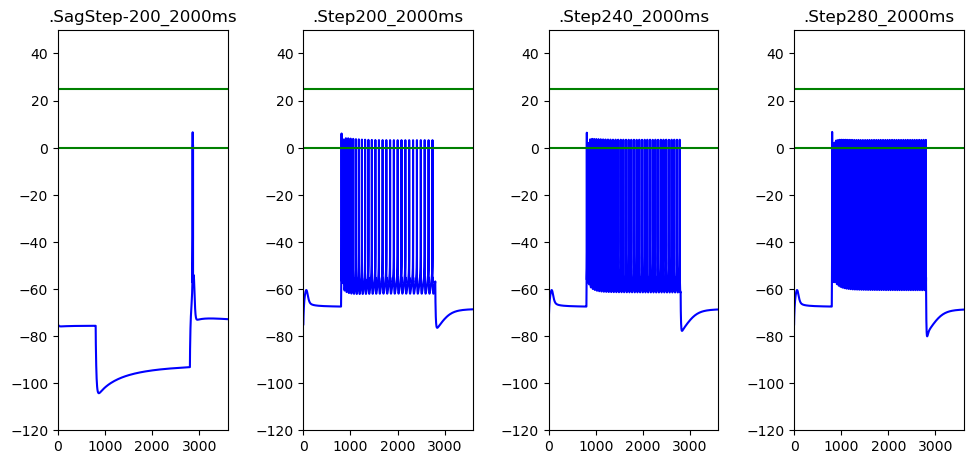





control_136 20007 4 | 7
AP_amplitude:	 23.5 	<<<


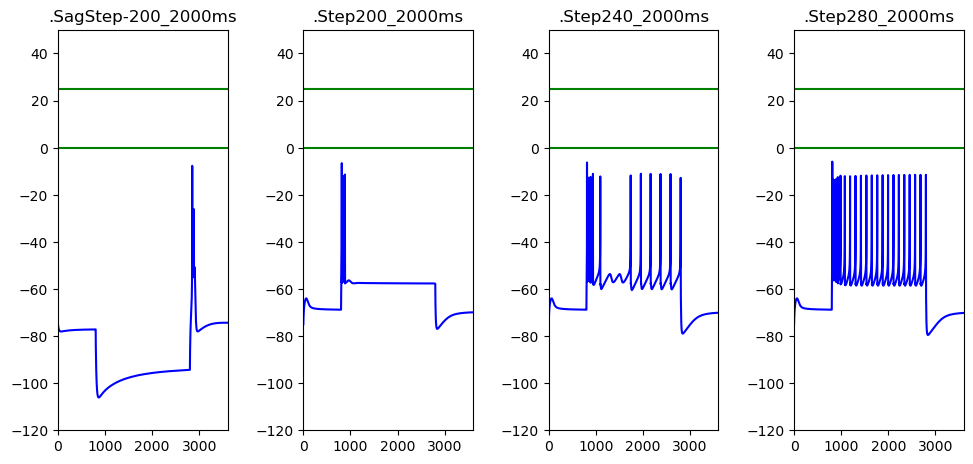

AP too short



control_136 20260 10 | 8
AP_amplitude:	 17.9 	<<<


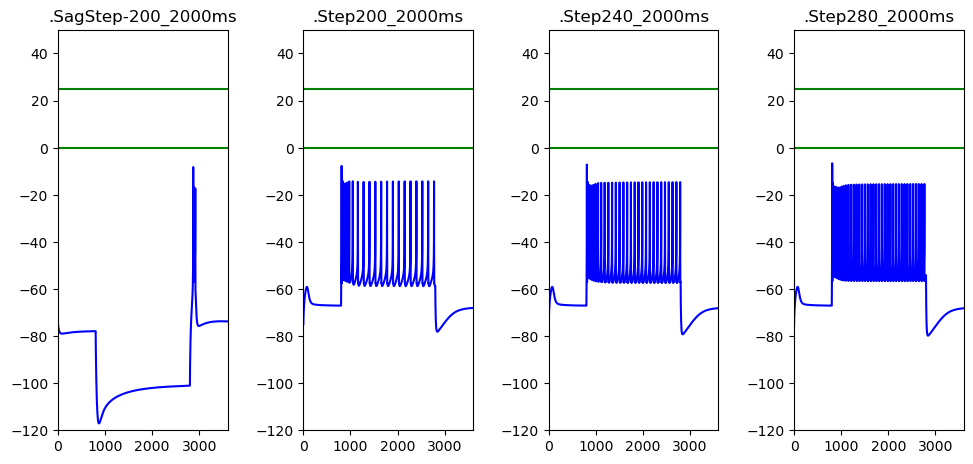

AP too short



control_136 21080 7 | 9
AP_amplitude:	 58.0 	


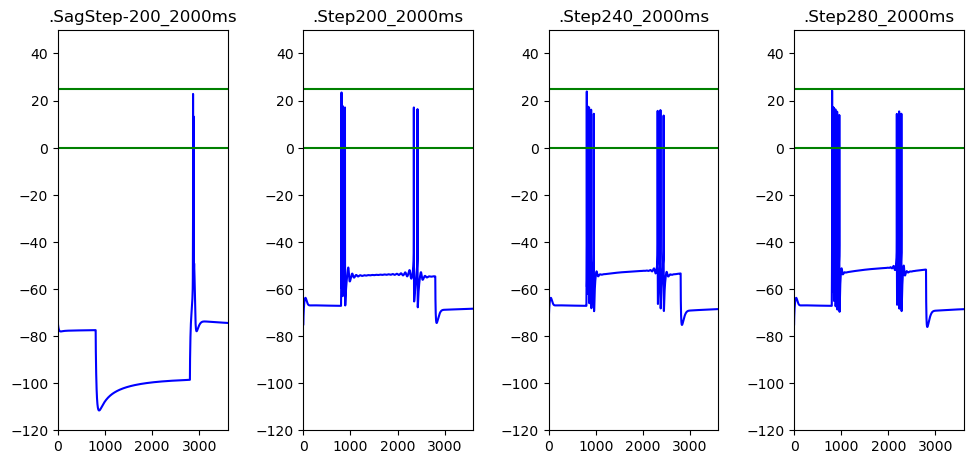





control_136 23252 13 | 10
AP_amplitude:	 18.5 	<<<


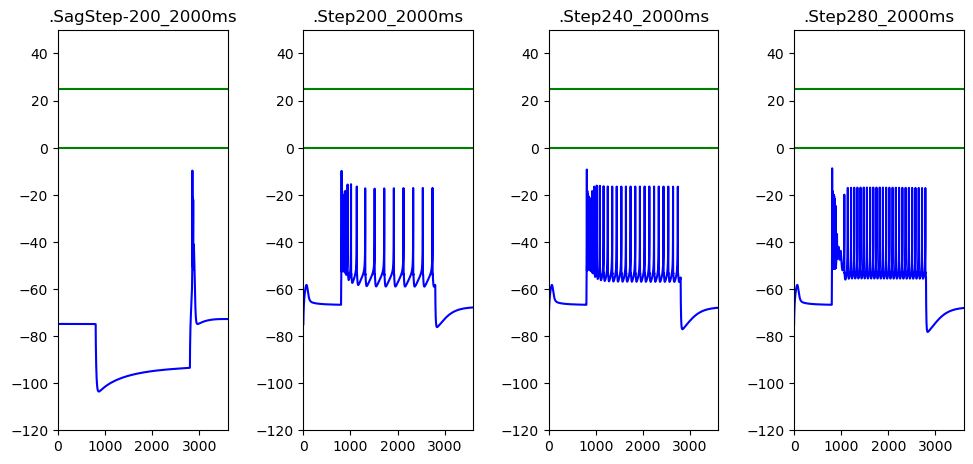

AP too short



control_136 23570 13 | 11
AP_amplitude:	 22.6 	<<<


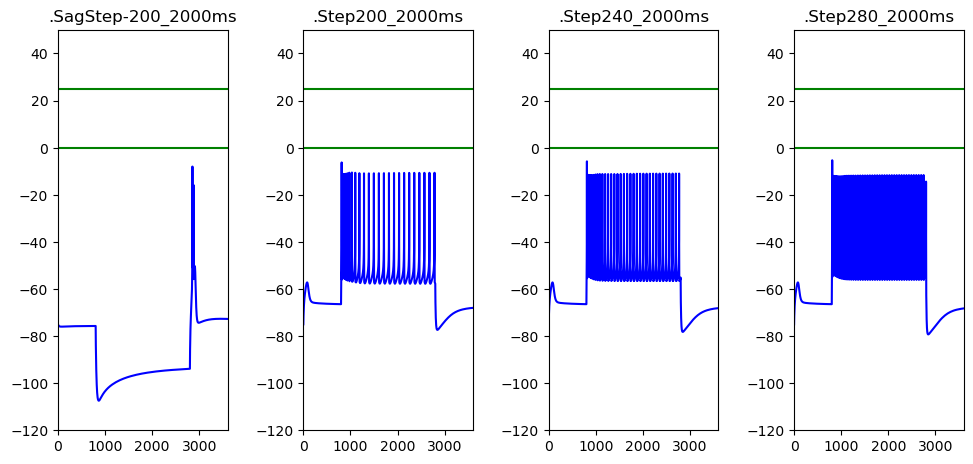

AP too short



control_136 24047 5 | 12
AP_amplitude:	 80.1 	<<<


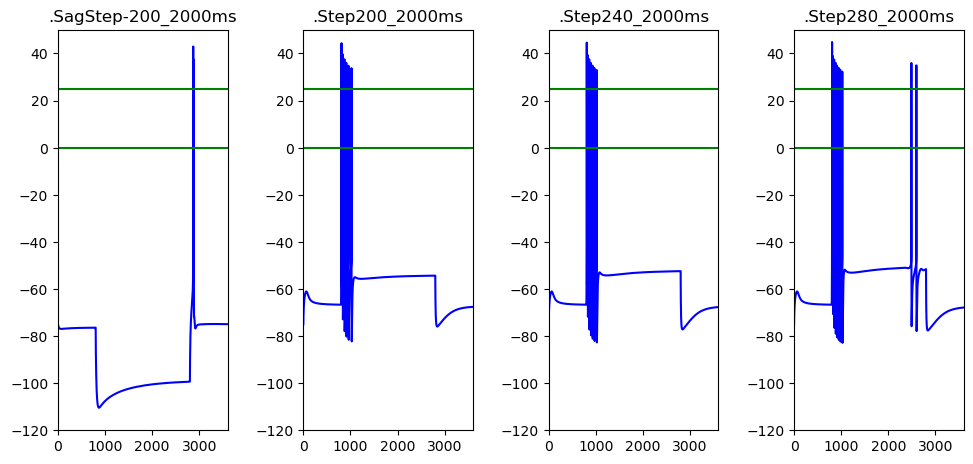

AP too tall



control_136 24756 13 | 13
AP_amplitude:	 53.9 	


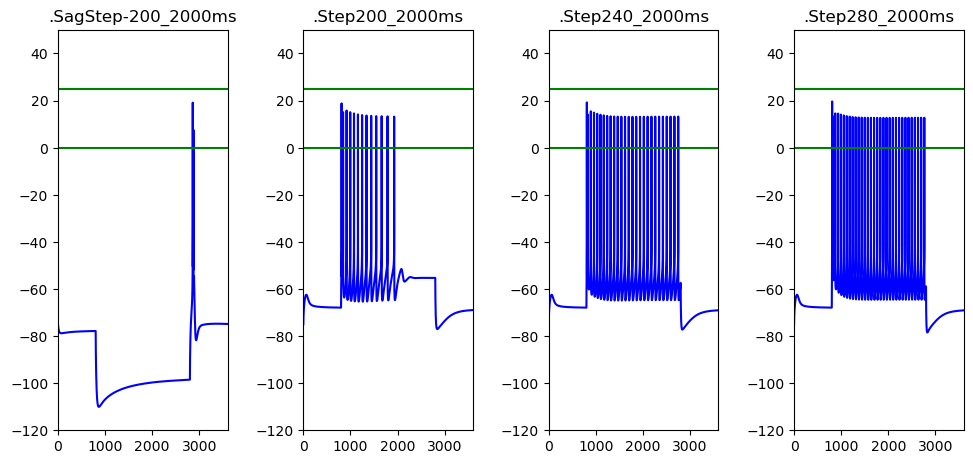





lesioned_136 1066 8 | 14
AP_amplitude:	 56.8 	


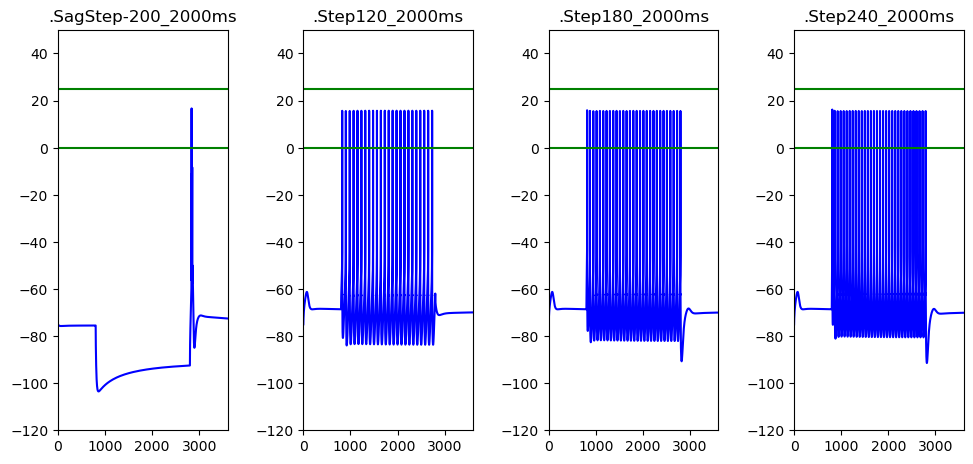





lesioned_136 1441 11 | 15
AP_amplitude:	 44.7 	


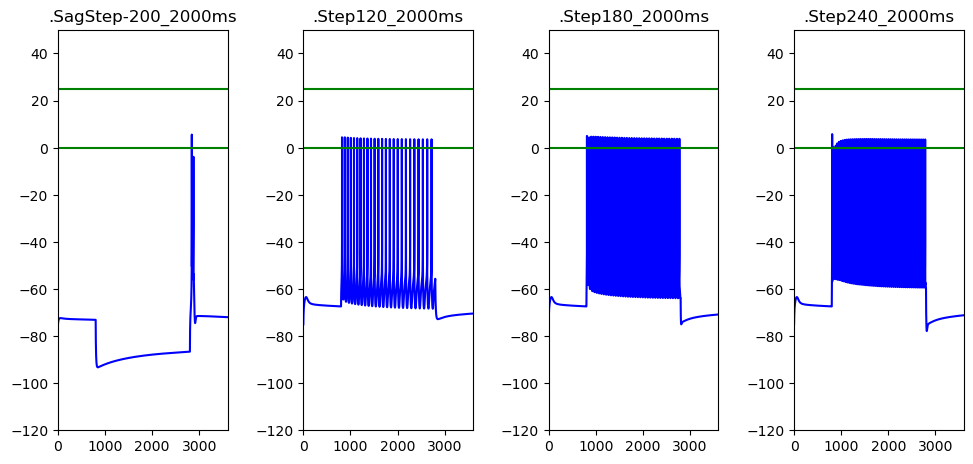





lesioned_136 1820 3 | 16
AP_amplitude:	 78.1 	<<<


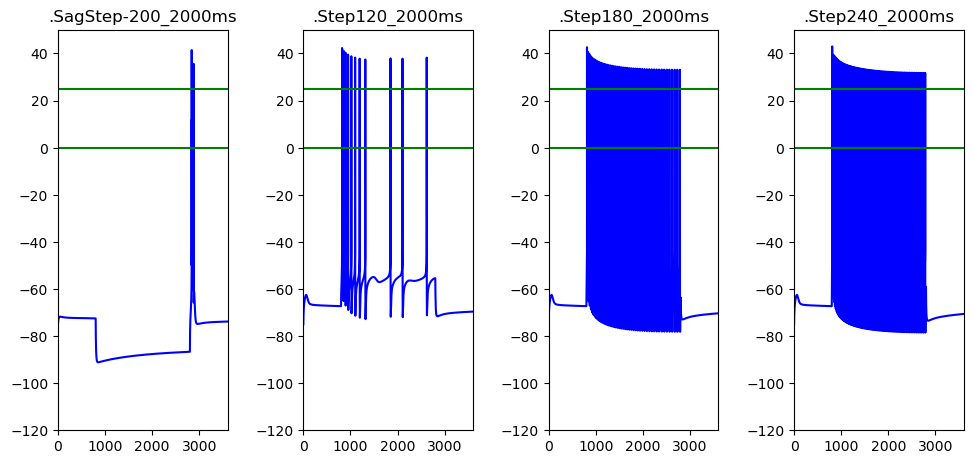

AP too tall



lesioned_136 1876 11 | 17
AP_amplitude:	 37.4 	


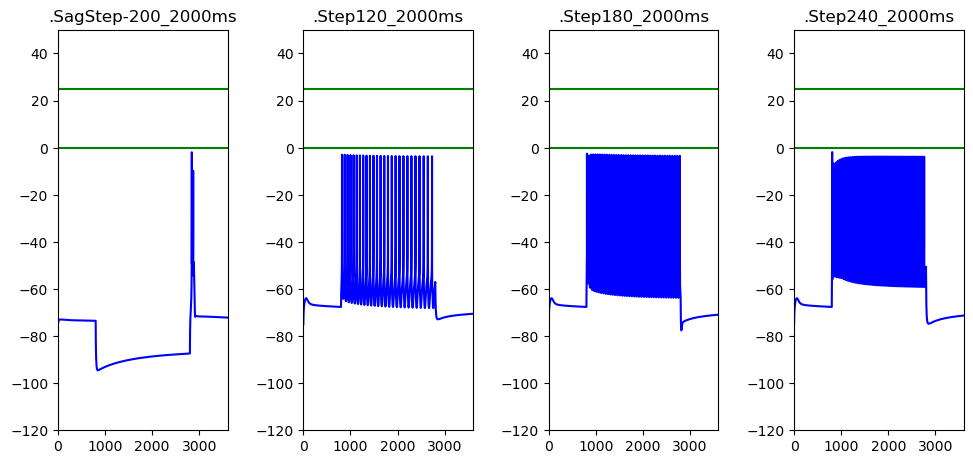





lesioned_136 2031 11 | 18
AP_amplitude:	 29.0 	<<<


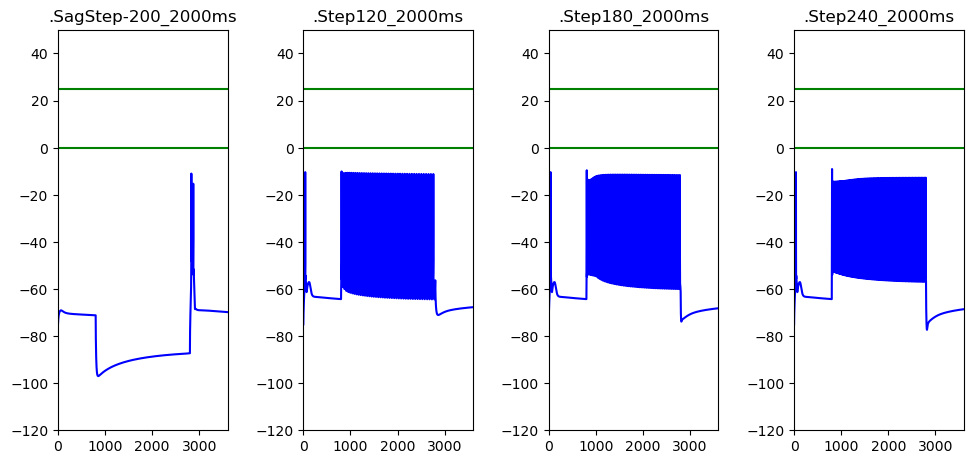

AP too short



lesioned_136 2093 14 | 19
AP_amplitude:	 61.4 	


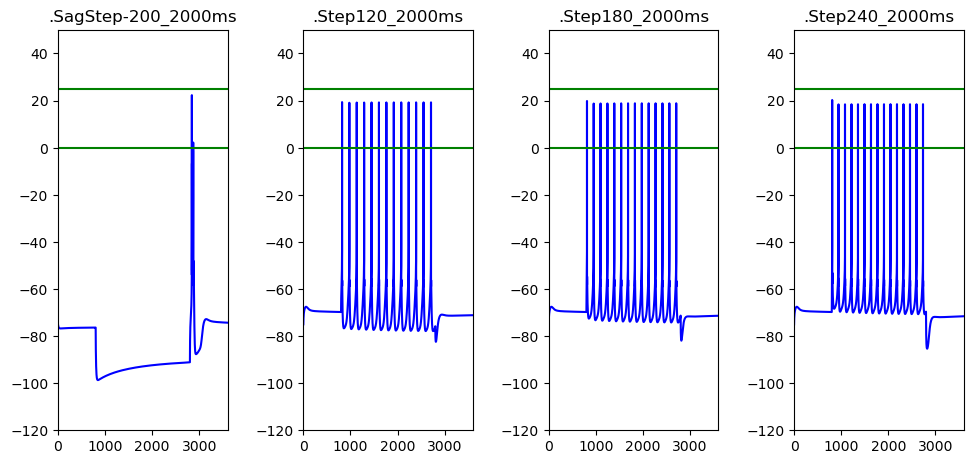





lesioned_136 2433 11 | 20
AP_amplitude:	 43.8 	


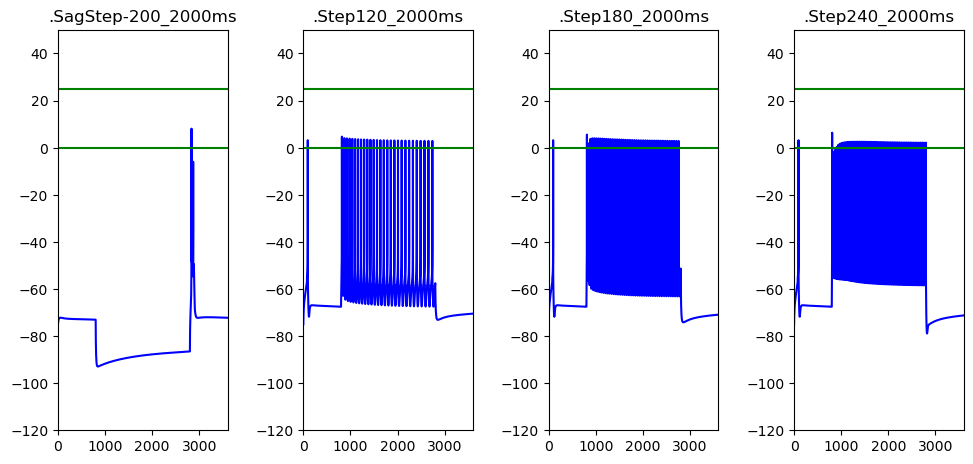





lesioned_136 3022 14 | 21
AP_amplitude:	 62.2 	


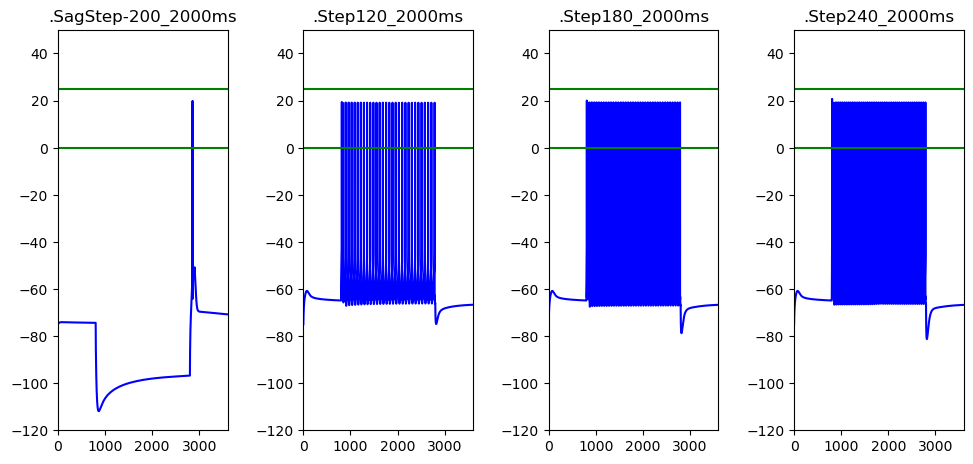





lesioned_136 3479 4 | 22
AP_amplitude:	 25.6 	<<<


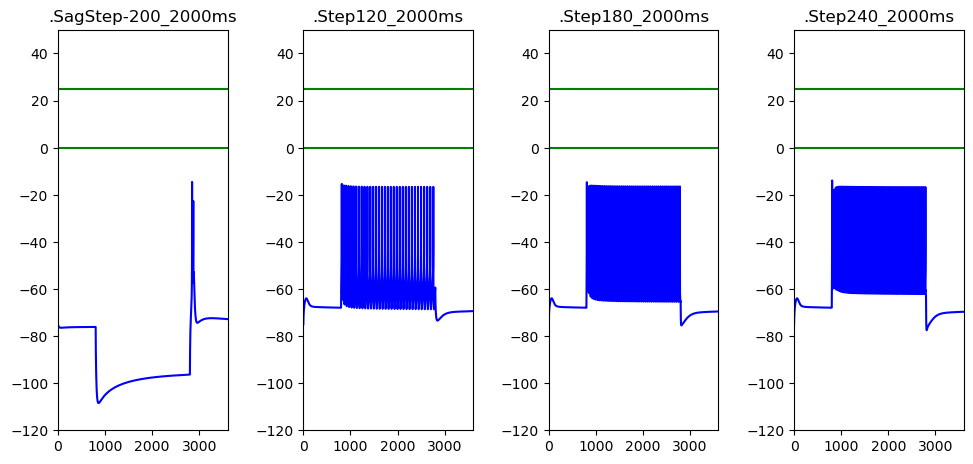

AP too short



lesioned_136 4212 8 | 23
AP_amplitude:	 42.2 	


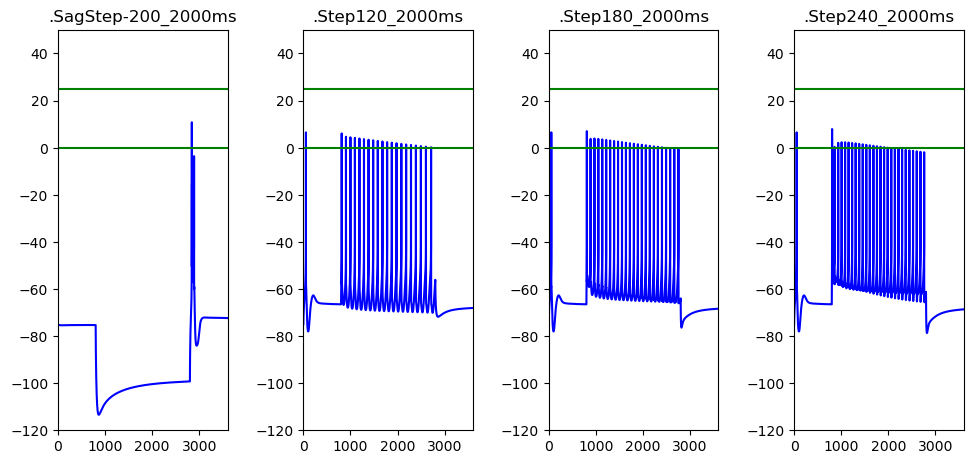





lesioned_136 4277 9 | 24
AP_amplitude:	 65.8 	<<<


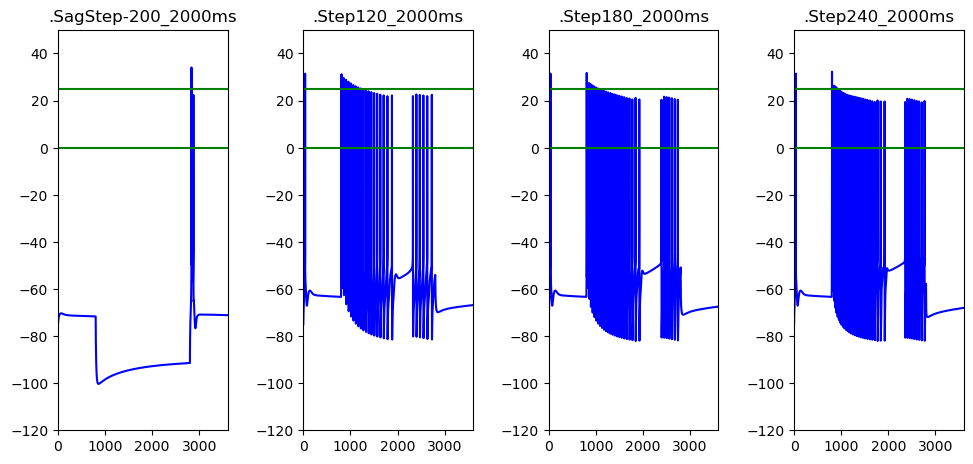

AP too tall



lesioned_136 7464 12 | 25
AP_amplitude:	 37.1 	


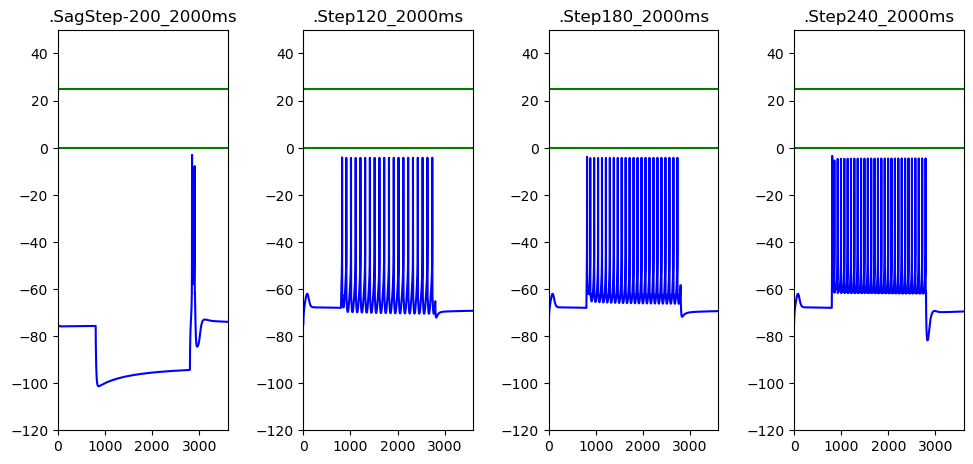





lesioned_136 7854 3 | 26
AP_amplitude:	 78.1 	<<<


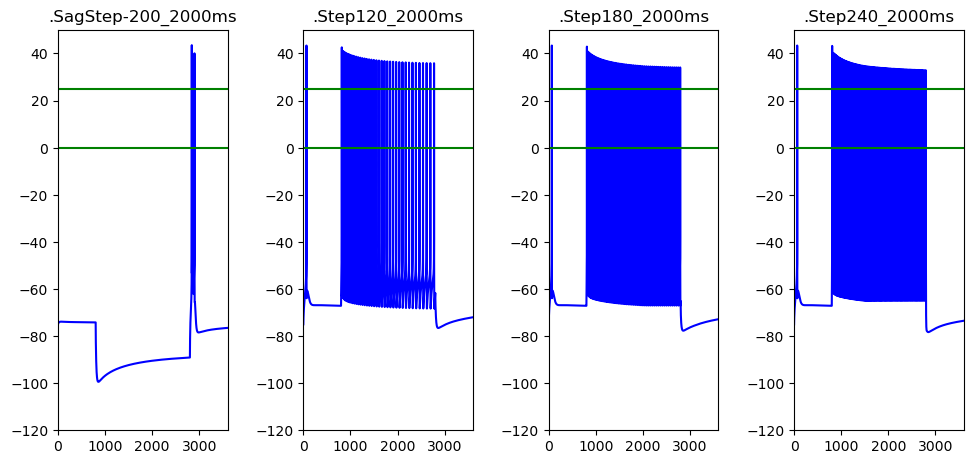

AP too tall



lesioned_136 9252 3 | 27
AP_amplitude:	 36.1 	


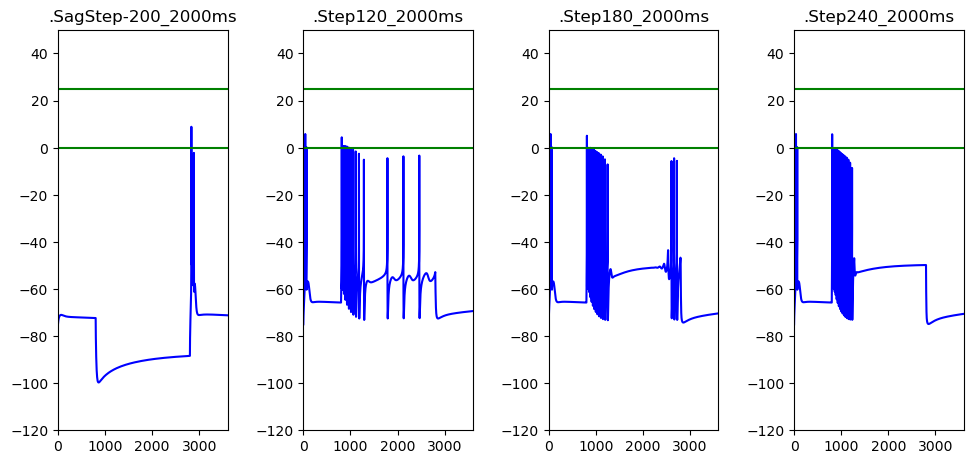





lesioned_136 9663 3 | 28
AP_amplitude:	 56.7 	


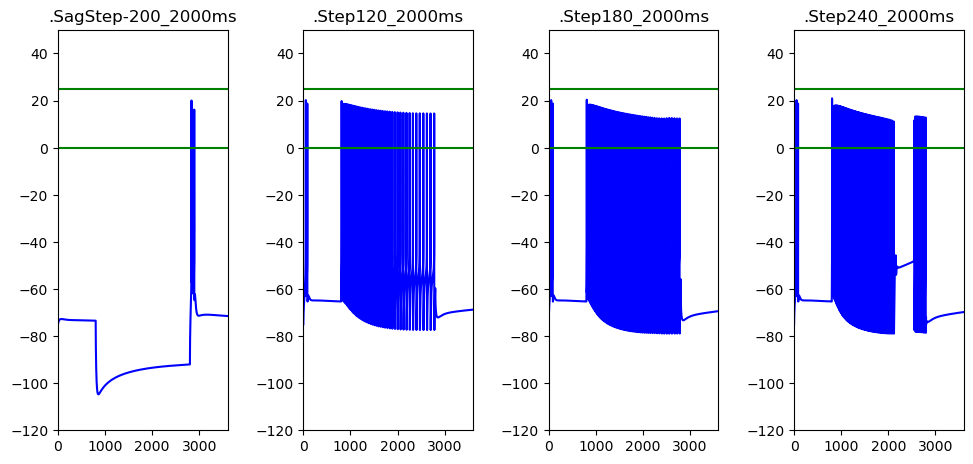





lesioned_136 9685 3 | 29
AP_amplitude:	 69.3 	<<<


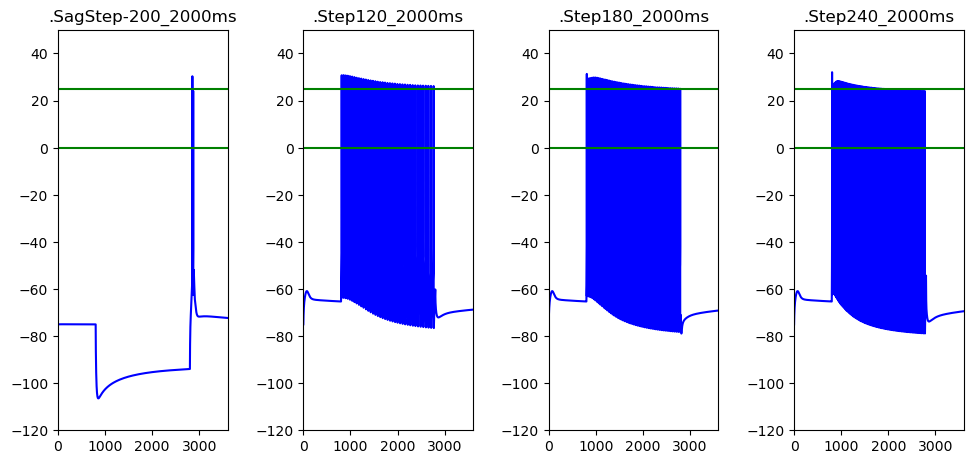

AP too tall



lesioned_136 9811 3 | 30
AP_amplitude:	 72.5 	<<<


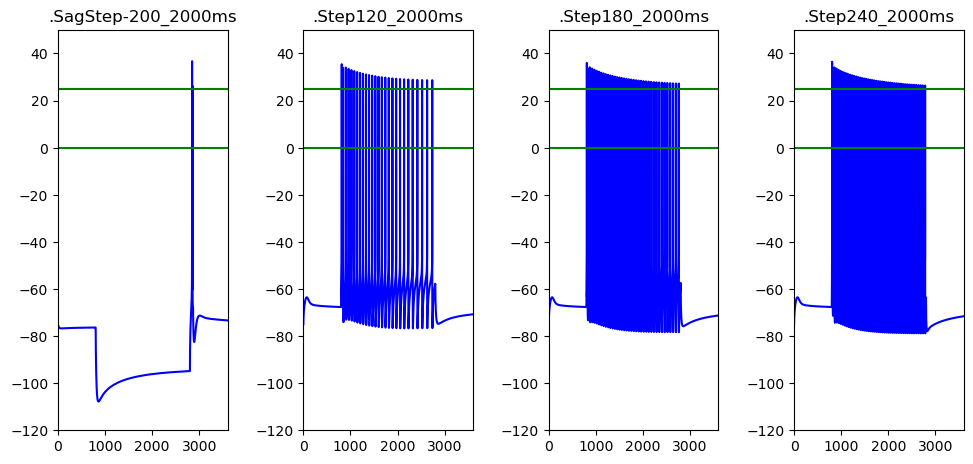

AP too tall



lesioned_136 13016 13 | 31
AP_amplitude:	 22.3 	<<<


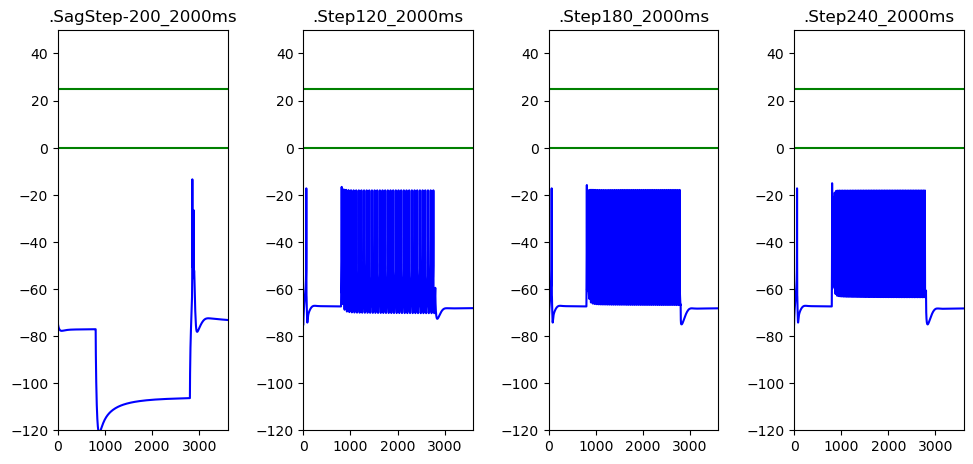

AP too short



lesioned_136 16061 3 | 32
AP_amplitude:	 56.2 	


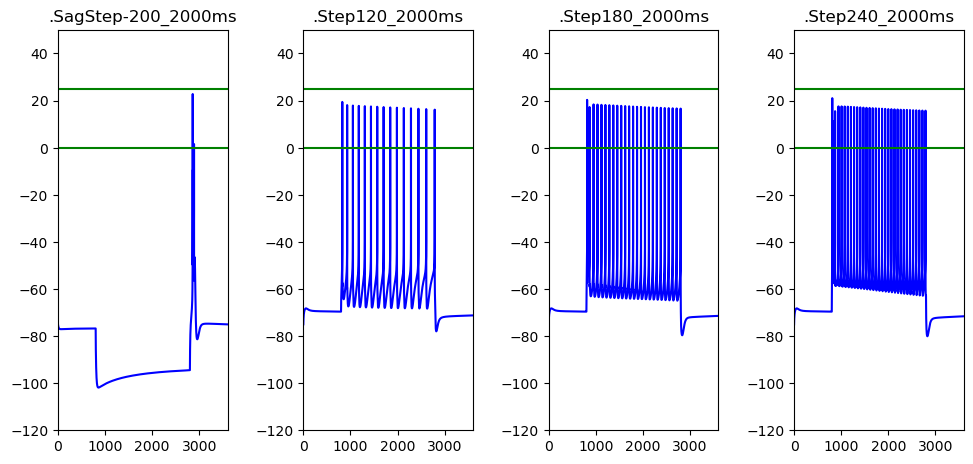





lesioned_136 17222 9 | 33
AP_amplitude:	 25.2 	<<<


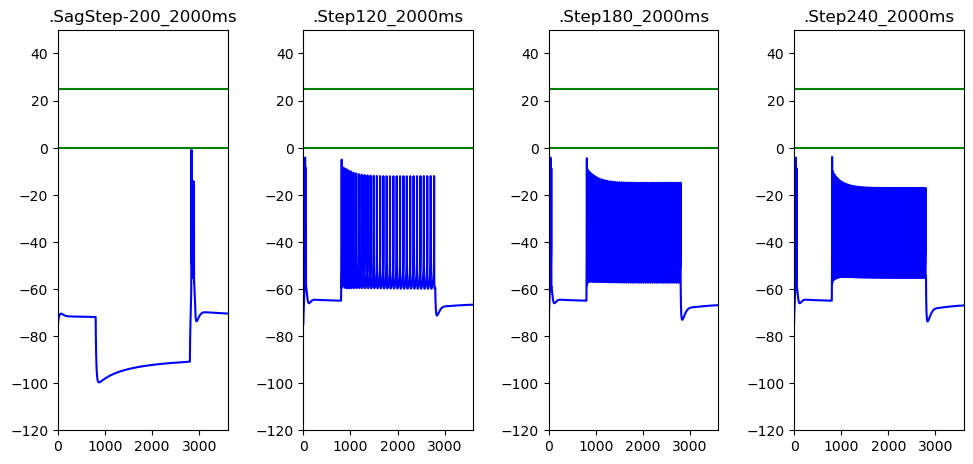

AP too short



lesioned_136 17236 9 | 34
AP_amplitude:	 25.4 	<<<


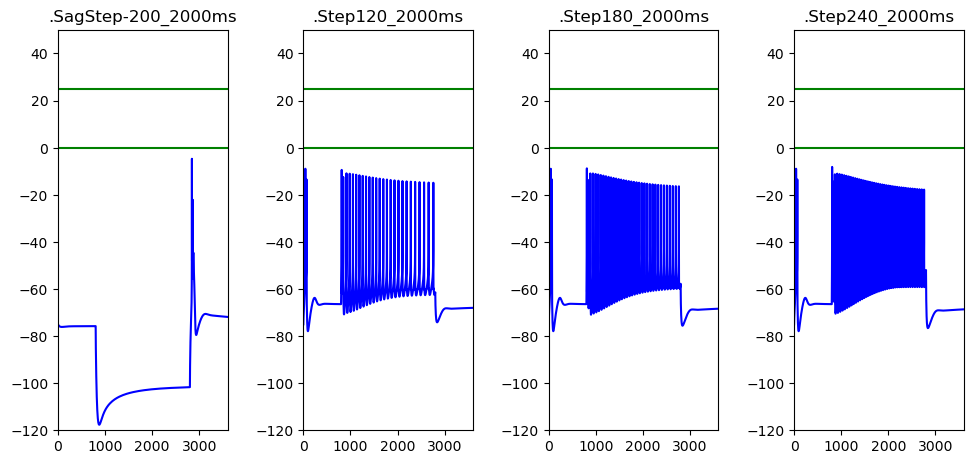

AP too short



lesioned_136 18896 13 | 35
AP_amplitude:	 42.7 	


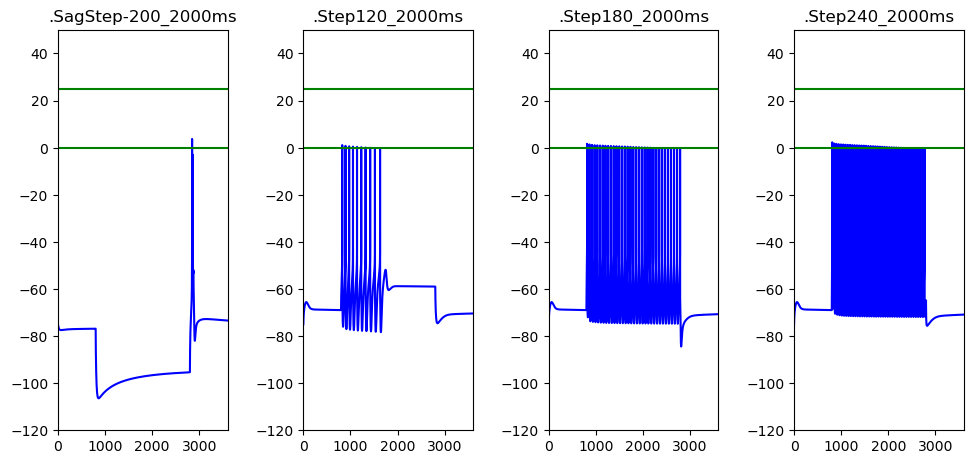

In [4]:
ap_amp_min = 35
ap_amp_max = 65

for i in range(n):
    trace = np.load('trace_136_old_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    
    # calculate average ap peak, ap amplitude, ahp depth
    ap_amp = []
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }
            out = eFELExt.efel.getFeatureValues([tt], ['AP_amplitude'])[0]
            if out['AP_amplitude'] is not None:
                ap_amp.append(np.mean(out['AP_amplitude']))
    ap_amp = np.mean(ap_amp)
    
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-120, 50])
        
    plt.tight_layout(pad=2)
    print('AP_amplitude:\t', round(ap_amp, 1), '\t' if ap_amp >= ap_amp_min and ap_amp <= ap_amp_max else '\t<<<')
    plt.show()

    
    if ap_amp < ap_amp_min:
        note[i] = 'AP too short'
    elif ap_amp > ap_amp_max:
        note[i] = 'AP too tall'
    
        
    print(note[i])
    print('\n\n')

# AP 2 and 1 ratio

In [ ]:
ap_amp_min = 0.9

for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    del trace['responses']['.SagStep-200_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    ap_amp = []
    # calculate average ap peak, ap amplitude, ahp depth
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }                
            
            out = eFELExt.efel.getFeatureValues([tt], ['AP1_amp', 'AP2_amp'])[0]
            
            if out['AP1_amp'] is not None:
                ap_amp.append(np.mean(out['AP2_amp'] / out['AP1_amp']))
                
    ap_amp = np.min(ap_amp)
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 3, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()
    
    if ap_amp < ap_amp_min:
        note[i] = 'AP ratio too low'     
    
        
    print(note[i])
    print('\n\n')

# AHP depth check

control_136 1601 7 | 0


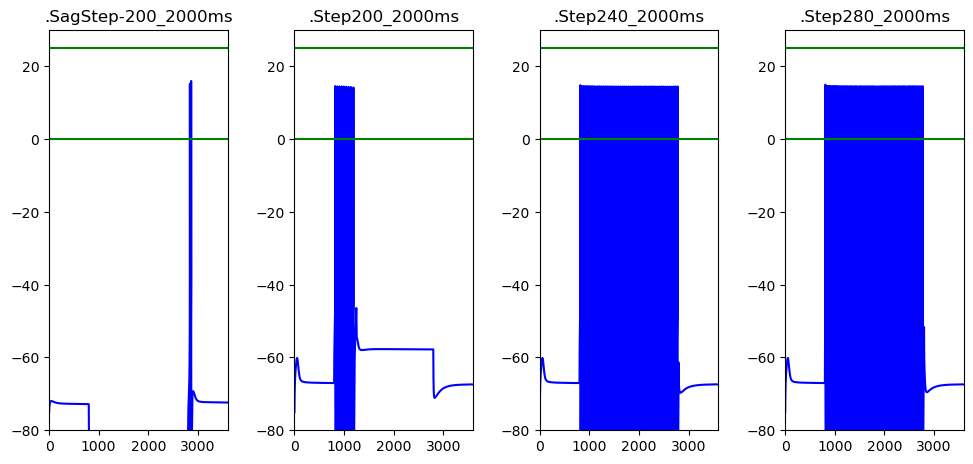





control_136 7504 11 | 3


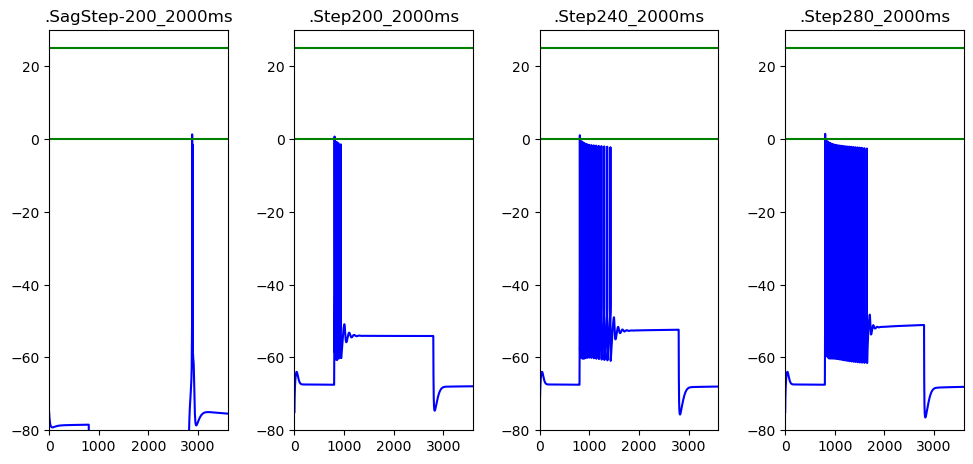





control_136 9847 11 | 4


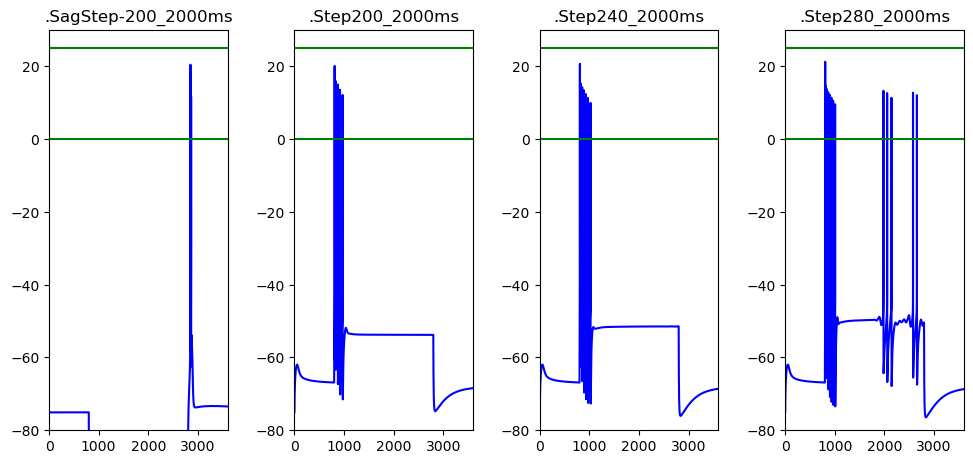





control_136 16281 13 | 5


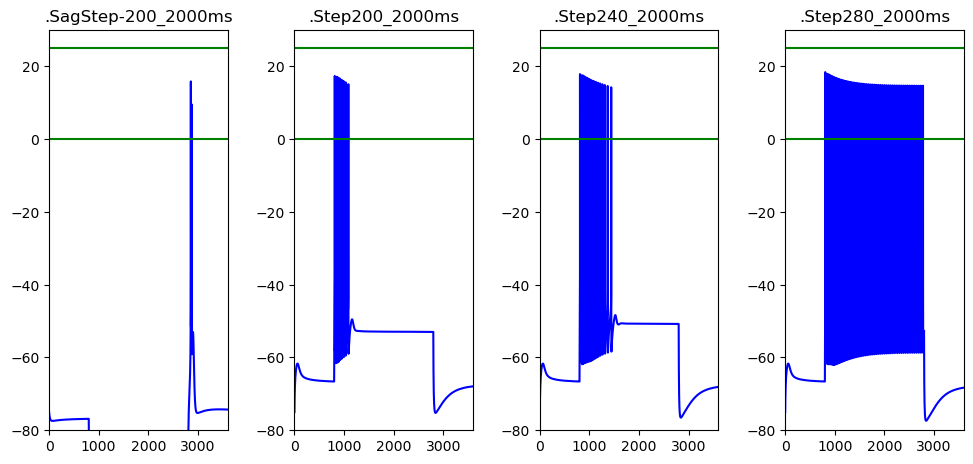





control_136 17782 4 | 6


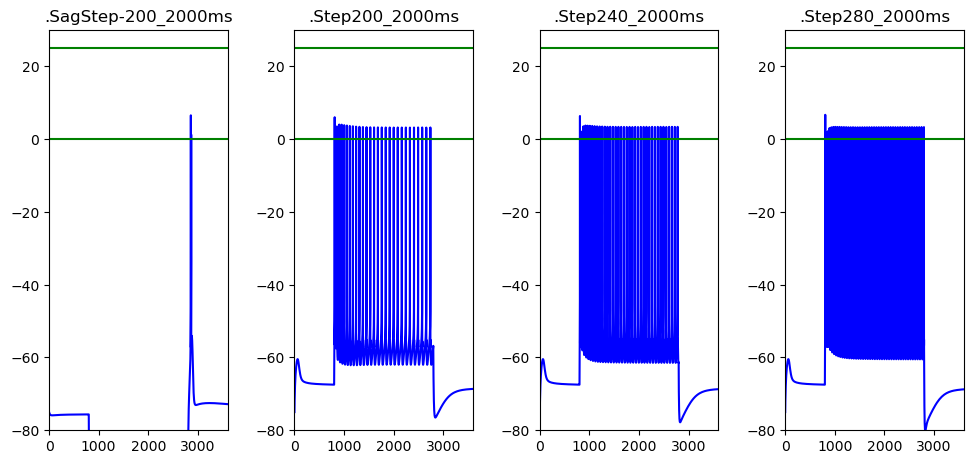





control_136 21080 7 | 9


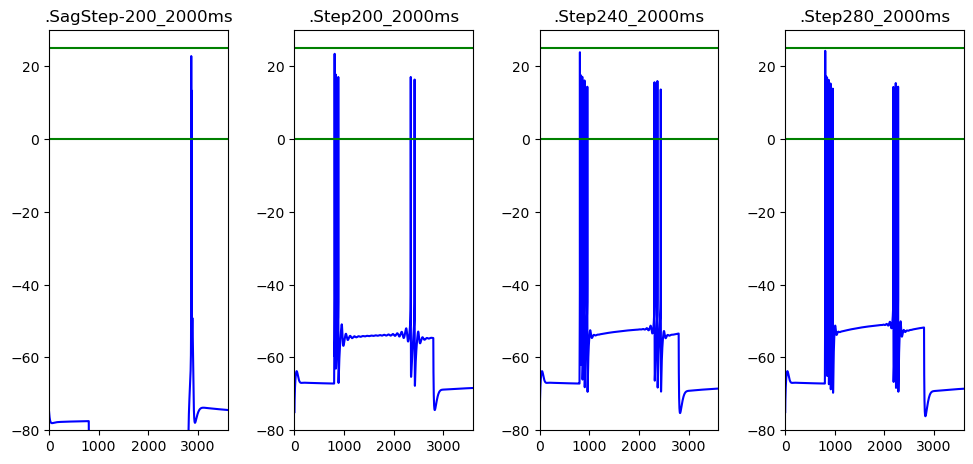





control_136 24756 13 | 13


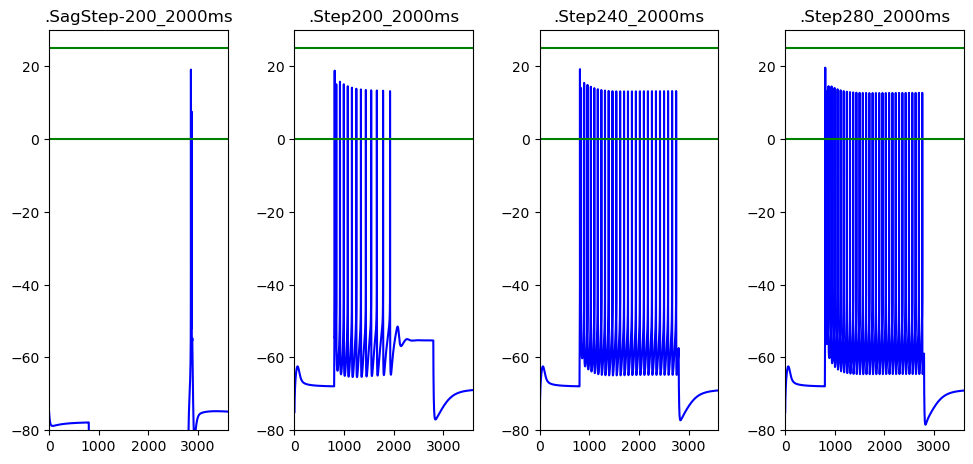





lesioned_136 1066 8 | 14


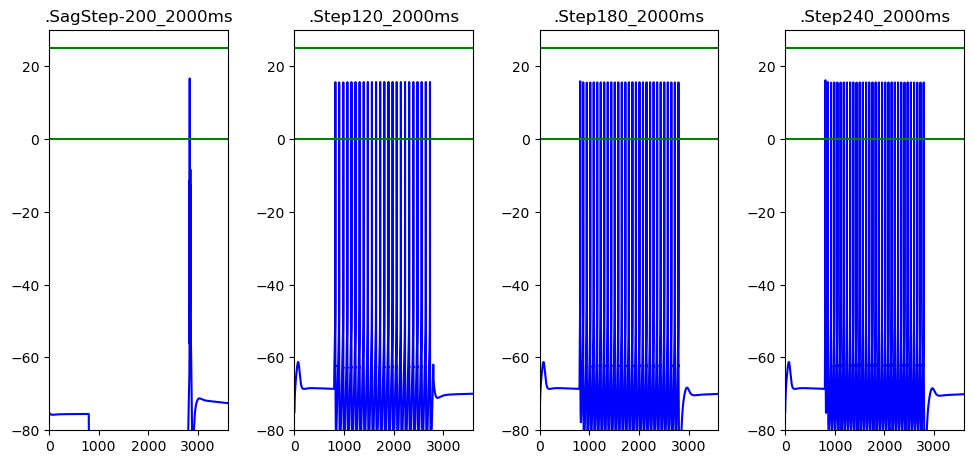





lesioned_136 1441 11 | 15


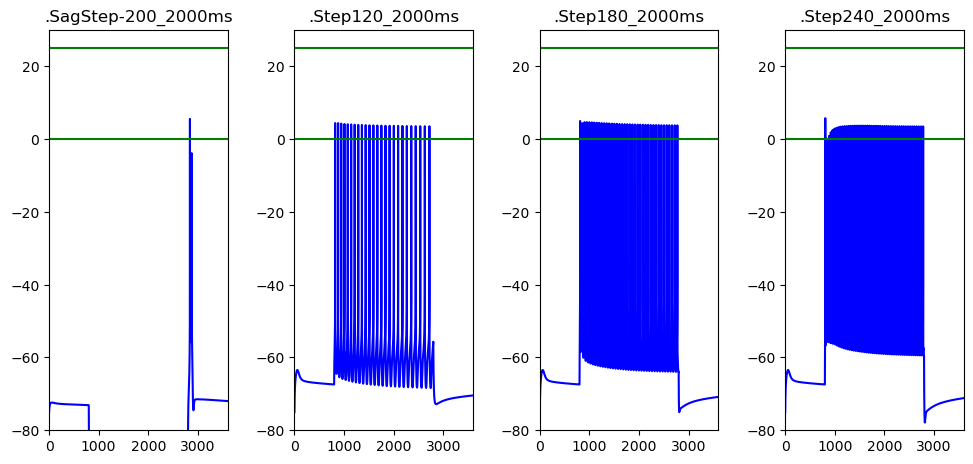





lesioned_136 1876 11 | 17


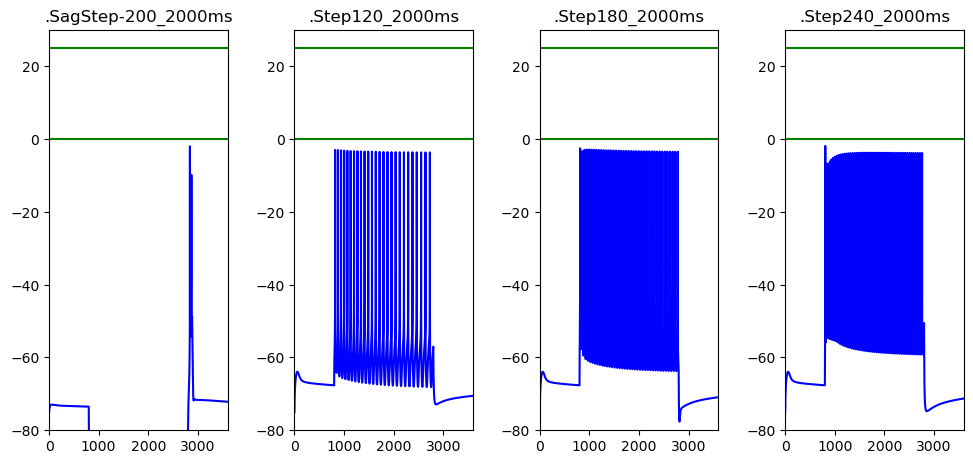





lesioned_136 2093 14 | 19


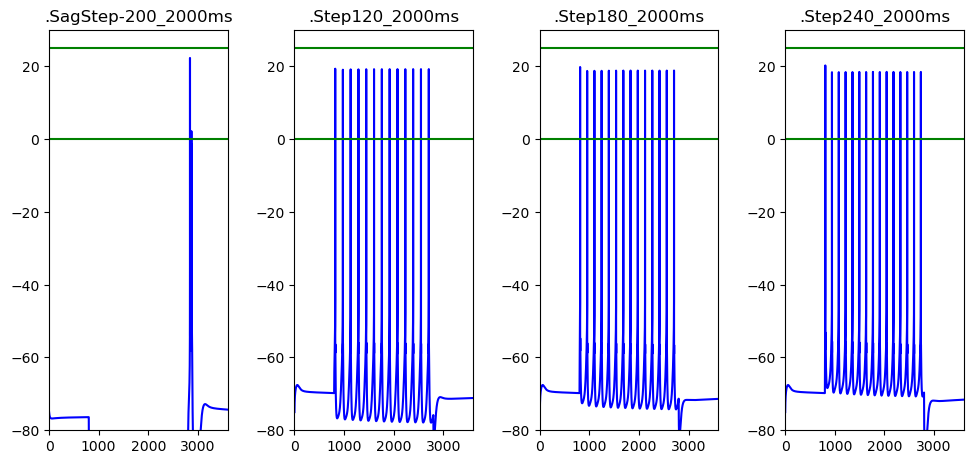





lesioned_136 2433 11 | 20


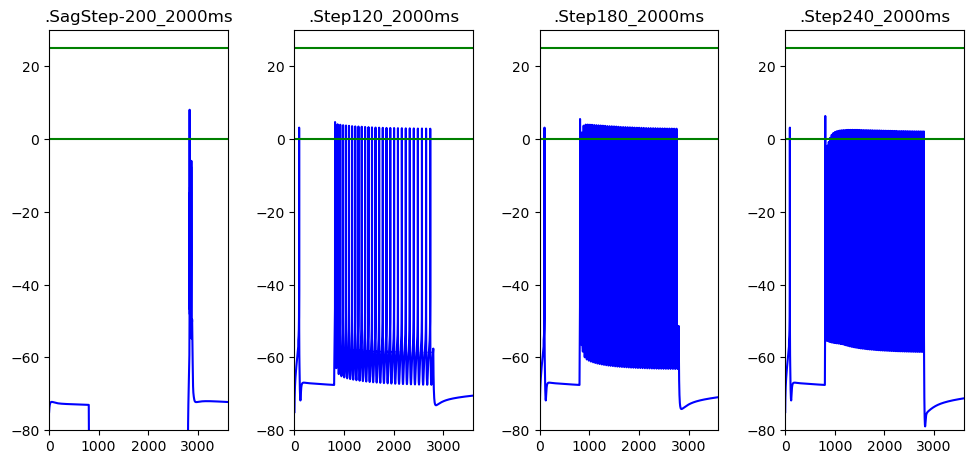





lesioned_136 3022 14 | 21


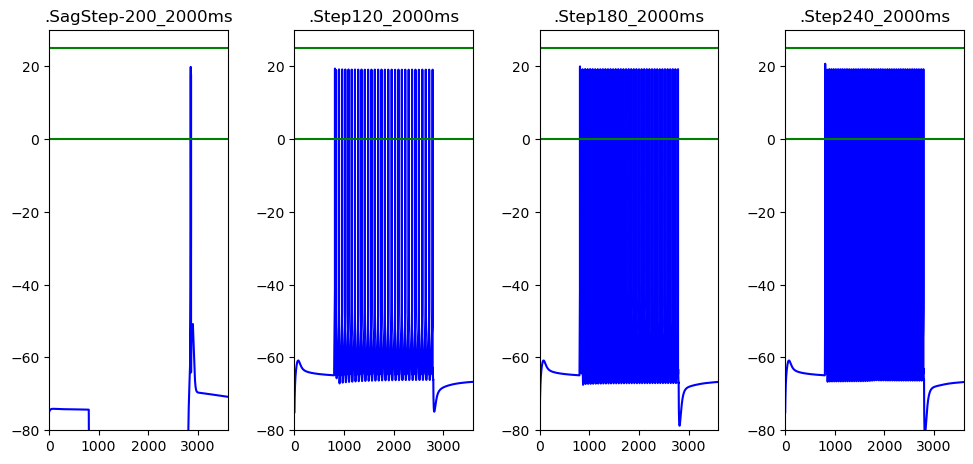





lesioned_136 4212 8 | 23


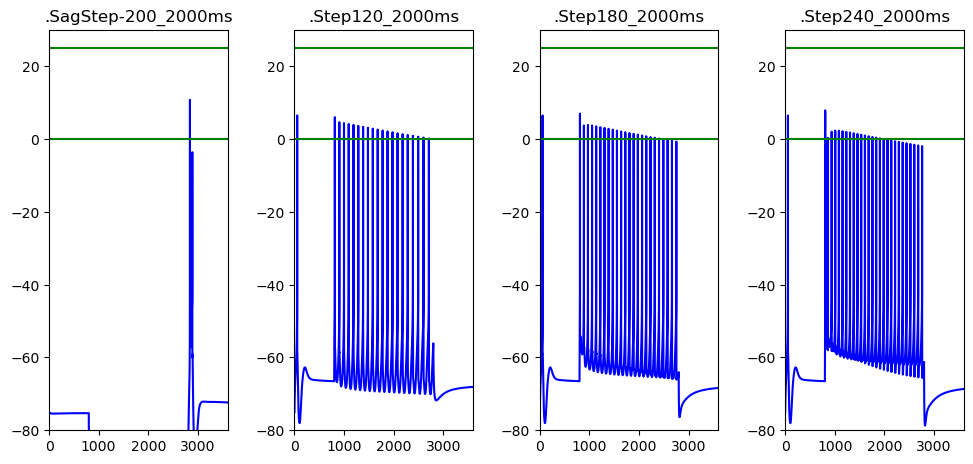





lesioned_136 7464 12 | 25


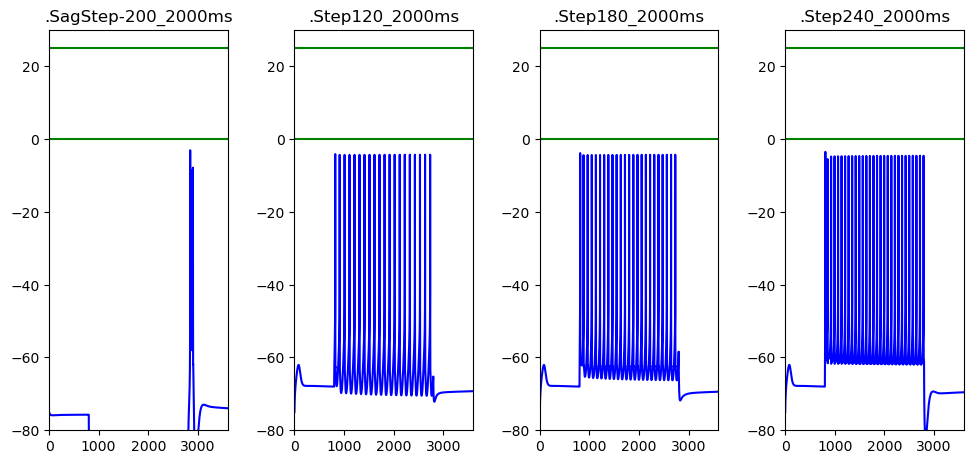





lesioned_136 9252 3 | 27


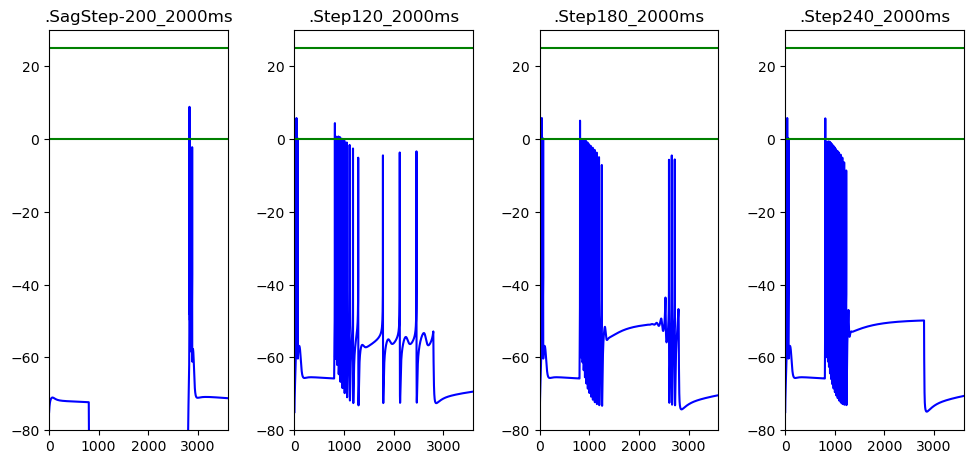





lesioned_136 9663 3 | 28


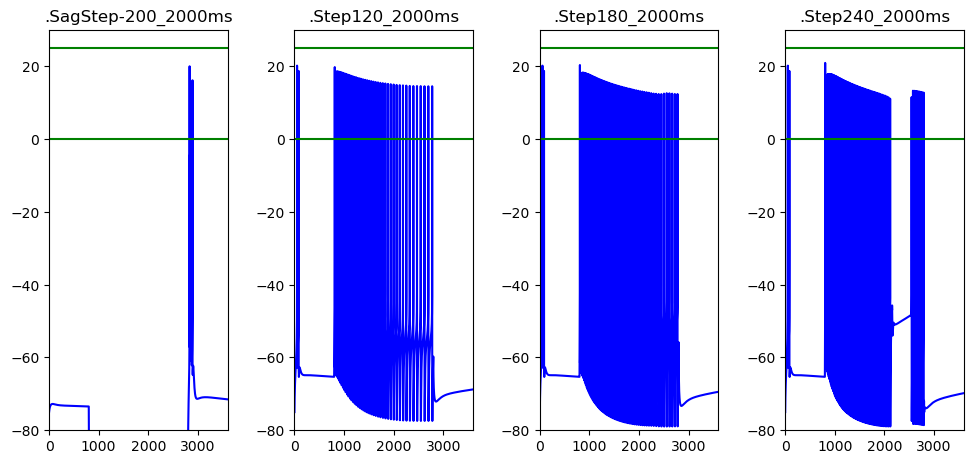





lesioned_136 16061 3 | 32


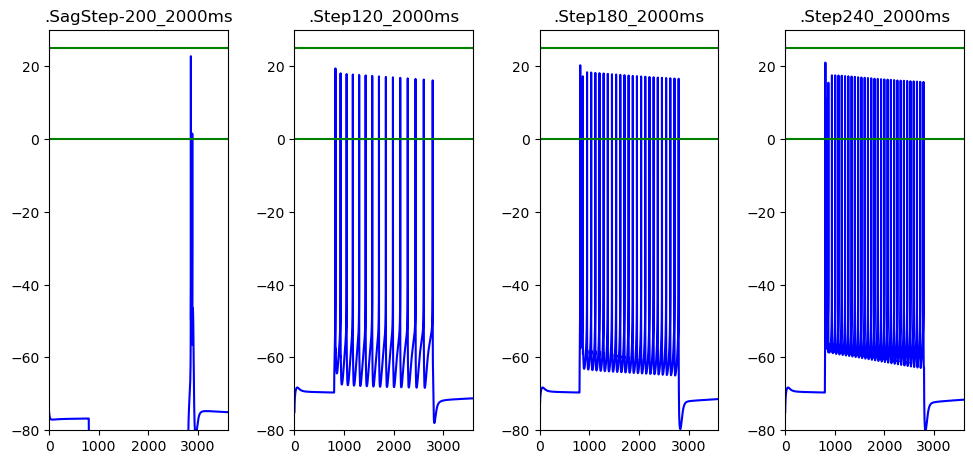





lesioned_136 18896 13 | 35


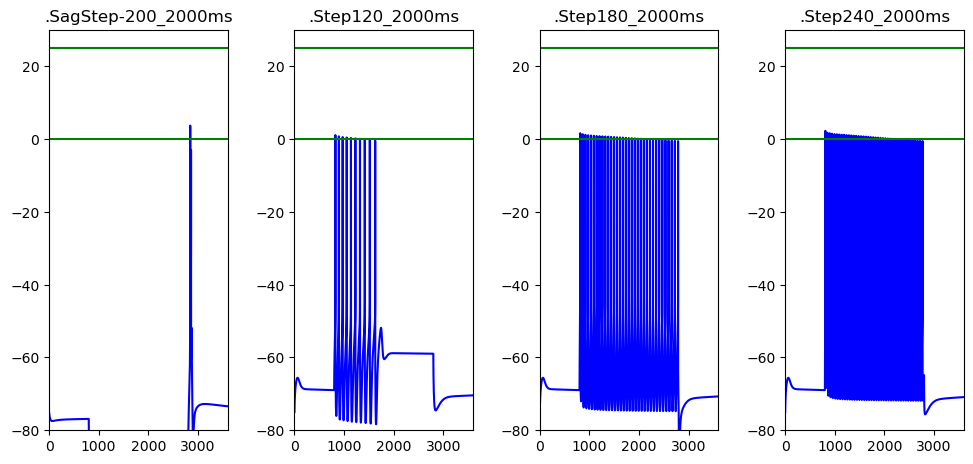

In [5]:
for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_old_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    
    # calculate average ap peak, ap amplitude, ahp depth
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }    
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()
        
        
    print(note[i])
    print('\n\n')

In [6]:
for i in [ 0, 4,9, 14,19,21,27,28,35, ]:
    note[i] = 'AHP too low'

# Accommodation

In [ ]:
for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()

    print('\n\n')

In [ ]:
for i in [ 18, 21, 27,  ]:
    note[i] = 'non physiological adaptation'

control_136 7504 11 | 3


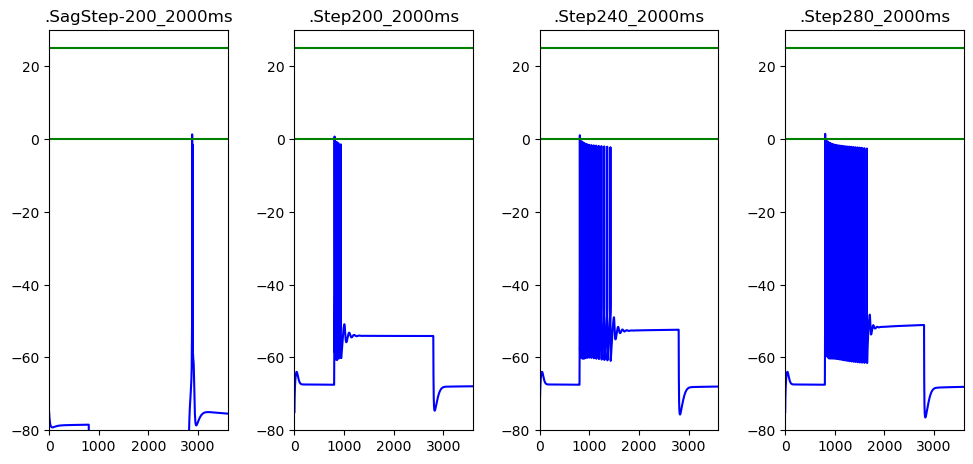




control_136 16281 13 | 5


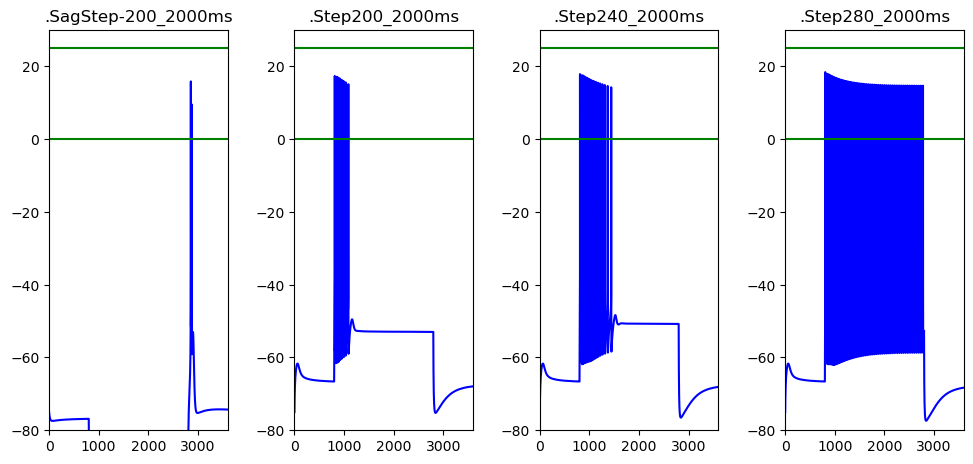




control_136 17782 4 | 6


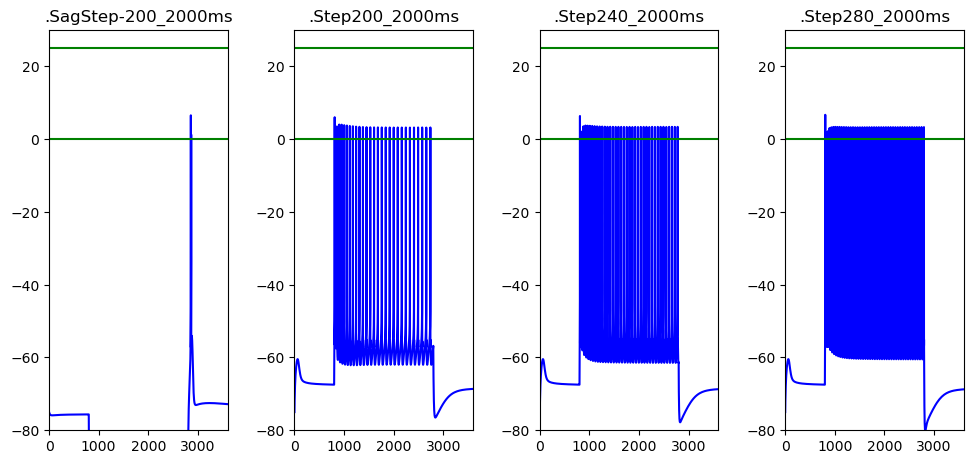




control_136 24756 13 | 13


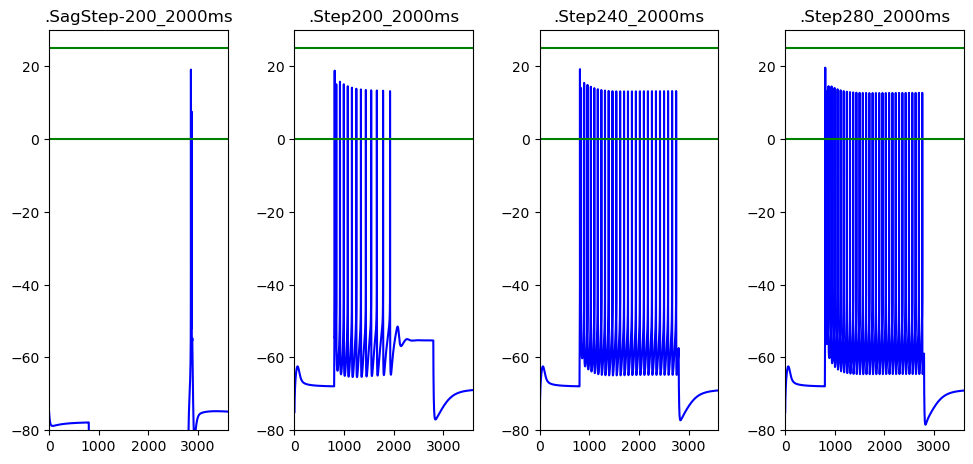




lesioned_136 1441 11 | 15


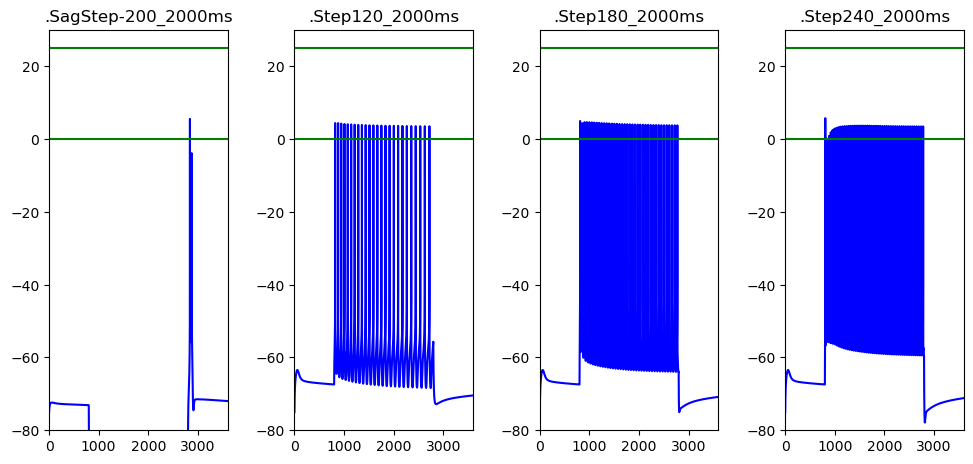




lesioned_136 1876 11 | 17


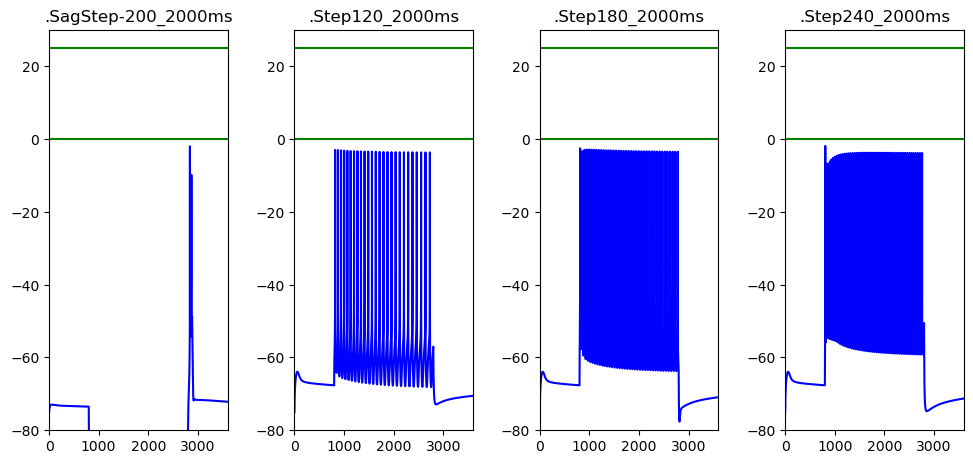




lesioned_136 2433 11 | 20


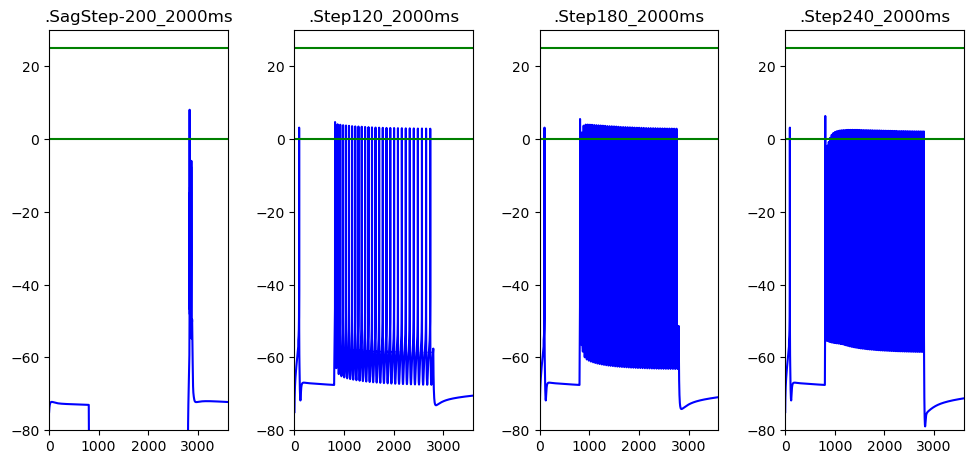




lesioned_136 4212 8 | 23


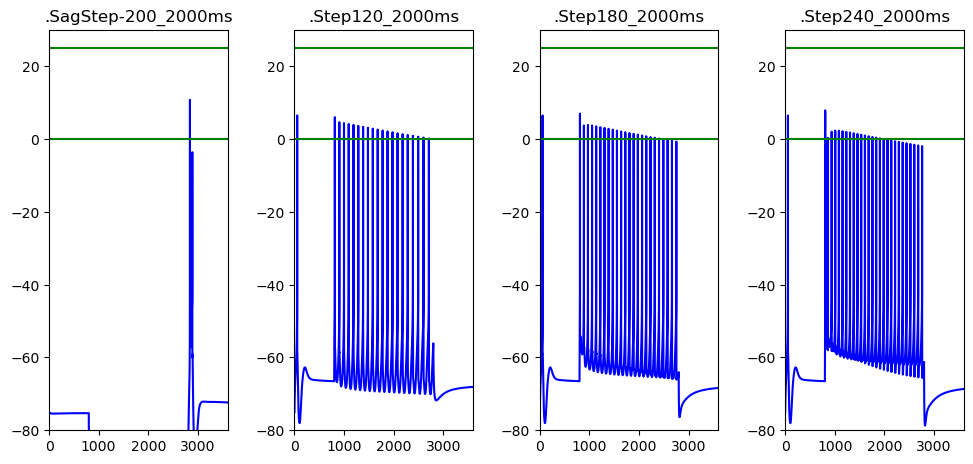




lesioned_136 7464 12 | 25


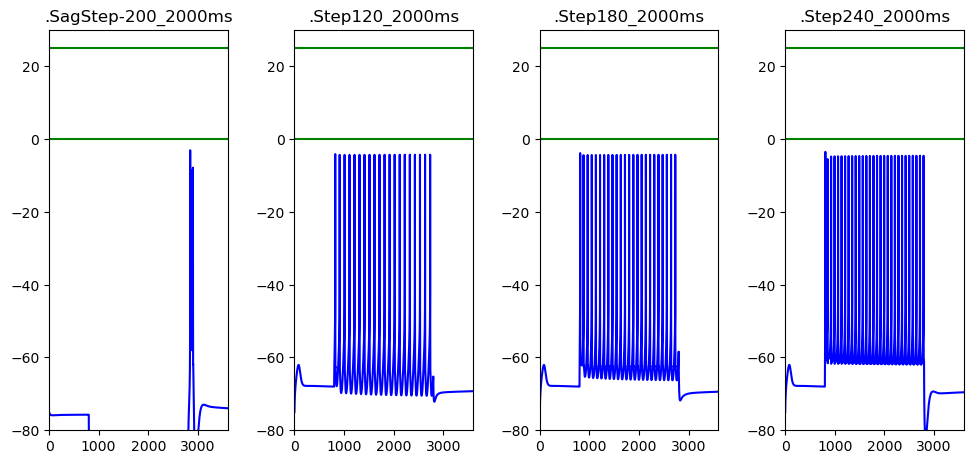




lesioned_136 16061 3 | 32


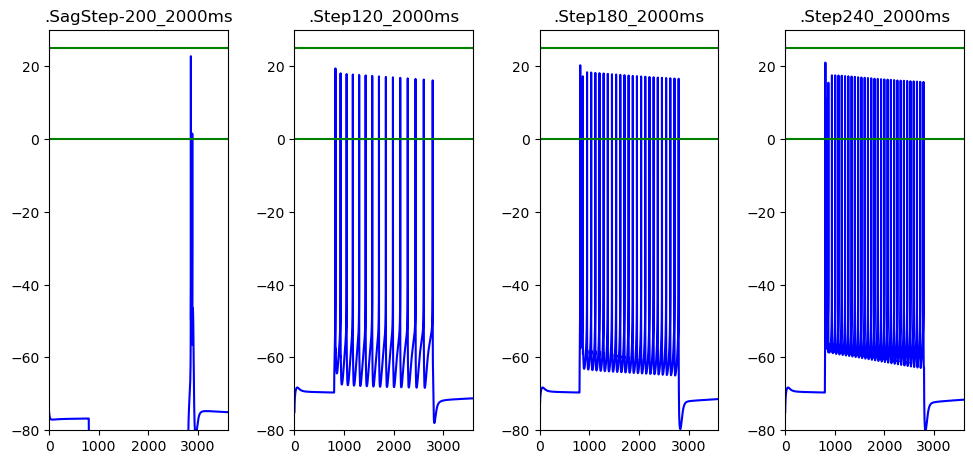

In [8]:
for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_old_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()

    print('\n\n')

In [9]:
# output selected neurons
hof_chk1 = np.load('hof_chk1_old.npy', allow_pickle=True).tolist()
hof_chk1_keys = sorted(list(hof_chk1.keys()))
hof_chk2 = {}
for i, k in enumerate(hof_chk1_keys):
    if len(note[i]) == 0:
        hof_chk2[k] = hof_chk1[k]
np.save('hof_chk2_old.npy', hof_chk2, allow_pickle=True)

In [10]:
import pandas as pd
pd.DataFrame(list(hof_chk2.keys()))[0].value_counts()

lesioned_136    6
control_136     4
Name: 0, dtype: int64